# Импорты

Загрузка файла

In [ ]:
! pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
! gdown --id 1CMVc3UcgjsADNWCNhlIjUEAgYdVfJX8H
#https://drive.google.com/file/d/1N6KLcYUpLKjfruh_6d_PRXZd6uVPGnJG/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CMVc3UcgjsADNWCNhlIjUEAgYdVfJX8H
To: /content/leopard-challenge-classification.zip
100% 639k/639k [00:00<00:00, 92.3MB/s]


In [ ]:
! unzip /content/leopard-challenge-classification.zip -d /content/competition_format

Archive:  /content/leopard-challenge-classification.zip
  inflating: /content/competition_format/sample_submission.csv  
  inflating: /content/competition_format/test.csv  
  inflating: /content/competition_format/train.csv  


## Подгрузка библиотек

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(4,3)})

pd.set_option('display.max_columns', None)

In [ ]:
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score

In [ ]:
! pip install catboost

from catboost import CatBoostClassifier, FeaturesData, metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.1 MB/s eta 0:00:00


In [ ]:
from catboost import Pool, cv

# 🔃 Точка рестарта 🔃

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')

test = pd.read_csv('/content/competition_format/test.csv')

In [ ]:
len(test)

5942

In [ ]:
len(train)

13863

In [ ]:
test.sample(2)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
2005,19692,25,165,70,78.0,1.0,0.9,1.0,1.0,119.0,71.0,90.0,182.0,86.0,82.0,82.0,15.1,1.0,0.8,19.0,22.0,33.0,Y,1,Y
2215,17409,30,170,55,72.5,1.0,1.2,1.0,1.0,102.0,62.0,84.0,192.0,87.0,54.0,121.0,16.4,1.0,1.0,32.0,34.0,23.0,Y,0,N


In [ ]:
train.sample(2)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
3822,1431,50,170,80,90.0,1.2,1.5,1.0,1.0,119.0,88.0,92.0,184.0,207.0,51.0,91.0,15.0,1.0,1.0,40.0,70.0,48.0,Y,0,Y,0
10204,13871,35,170,70,85.5,1.2,1.2,1.0,1.0,106.0,71.0,98.0,188.0,135.0,61.0,100.0,15.4,1.0,0.9,21.0,21.0,52.0,Y,0,N,0


# Итерация 1


**Кракто об итерации:**

Простой fit - predict с помощью Catboost

*Кракто об итерации:**

## Предобработка

## Деление на тренировочную и валидационную выборки

In [ ]:
train_full = train

In [ ]:
# делаю валидационную выборку для оценки и проверки
val, train = train_test_split(train_full, train_size=0.2, random_state=7374)

In [ ]:
train_full.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

## Настройка параметров модели, обучение

In [ ]:
X = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar'] #'gender',

cat_features = ['oral', 'tartar'] #'gender'

y = ['smoking']

In [ ]:
params = {'verbose':100,
          'random_seed':7374,
          'learning_rate':0.0095}

## Обучение на тренировочной + валидационной выборке

In [ ]:
# делю валидационную выборку дял того чтобы получить часть на которой можно будет оценить точность
val, val_test = train_test_split(val, train_size=0.2, random_state=7374)

In [ ]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features )
valid_data = Pool(data=val[X], label=val[y], cat_features=cat_features )

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_data,eval_set=valid_data)

0:	learn: 0.6888728	test: 0.6894248	best: 0.6894248 (0)	total: 79.4ms	remaining: 1m 19s
100:	learn: 0.5042727	test: 0.5427039	best: 0.5427039 (100)	total: 1.49s	remaining: 13.2s
200:	learn: 0.4700202	test: 0.5283101	best: 0.5283101 (200)	total: 2.16s	remaining: 8.6s
300:	learn: 0.4550999	test: 0.5269089	best: 0.5268046 (292)	total: 3.15s	remaining: 7.32s
400:	learn: 0.4454352	test: 0.5260039	best: 0.5260039 (400)	total: 3.85s	remaining: 5.75s
500:	learn: 0.4380048	test: 0.5252445	best: 0.5251837 (498)	total: 4.54s	remaining: 4.52s
600:	learn: 0.4318146	test: 0.5252799	best: 0.5249723 (565)	total: 5.23s	remaining: 3.47s
700:	learn: 0.4259875	test: 0.5249825	best: 0.5247853 (684)	total: 6.51s	remaining: 2.78s
800:	learn: 0.4200987	test: 0.5247573	best: 0.5245780 (779)	total: 8.2s	remaining: 2.04s
900:	learn: 0.4150271	test: 0.5248335	best: 0.5245359 (874)	total: 9.96s	remaining: 1.09s
999:	learn: 0.4099159	test: 0.5255576	best: 0.5245359 (874)	total: 11.8s	remaining: 0us

bestTest = 0.52

In [ ]:
val_test['score'] = model.predict_proba(val_test[X])[:,1]
val_test

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score
5620,18385,55,170,75,89.0,0.6,0.8,1.0,1.0,134.0,89.0,104.0,165.0,97.0,40.0,105.0,13.4,1.0,1.0,51.0,50.0,27.0,Y,1,Y,0,0.110125
11211,12987,35,175,90,93.5,1.2,1.2,1.0,1.0,130.0,83.0,94.0,220.0,132.0,40.0,154.0,15.0,1.0,1.0,27.0,29.0,20.0,Y,0,N,0,0.091617
6659,7653,25,165,80,91.0,1.2,1.0,1.0,1.0,108.0,72.0,100.0,251.0,174.0,57.0,159.0,16.6,1.0,1.0,30.0,39.0,47.0,Y,1,Y,0,0.255186
3746,13231,30,160,60,81.0,1.5,1.2,1.0,1.0,123.0,78.0,102.0,209.0,91.0,50.0,141.0,15.8,1.0,0.8,40.0,65.0,32.0,Y,0,N,0,0.093467
8307,13498,30,170,80,87.0,1.0,1.5,1.0,1.0,150.0,90.0,94.0,190.0,48.0,53.0,127.0,16.3,1.0,0.9,32.0,57.0,75.0,Y,0,Y,0,0.161488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11241,1390,40,165,70,88.0,1.0,1.2,1.0,1.0,128.0,85.0,97.0,227.0,185.0,45.0,145.0,14.3,1.0,1.0,21.0,34.0,65.0,Y,0,N,0,0.226559
10008,14781,25,170,80,82.0,1.0,1.2,1.0,1.0,106.0,74.0,100.0,170.0,50.0,52.0,108.0,16.6,1.0,0.8,32.0,52.0,28.0,Y,0,Y,0,0.103908
10837,19338,75,160,65,92.0,9.9,1.5,1.0,1.0,127.0,73.0,98.0,188.0,86.0,46.0,125.0,13.8,1.0,1.2,37.0,28.0,26.0,Y,0,Y,0,0.033582
6251,14218,55,175,60,78.0,1.2,1.0,1.0,1.0,104.0,70.0,117.0,222.0,49.0,99.0,121.0,12.9,1.0,0.8,17.0,12.0,17.0,Y,0,N,0,0.163924


<Axes: >

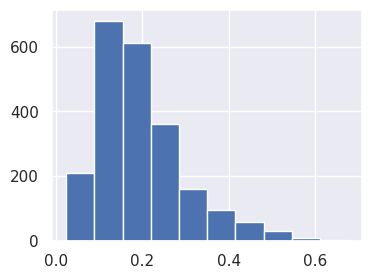

In [ ]:
val_test['score'].hist()

## Проверка на тестовой (валидационной части), подбор порога

In [ ]:
val_test.sample()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score
7467,13086,40,175,55,70.0,1.0,1.0,1.0,1.0,117.0,68.0,82.0,195.0,130.0,62.0,107.0,15.0,1.0,1.0,24.0,19.0,22.0,Y,0,Y,0,0.304686


In [ ]:
thrs = [0] + list(val_test['score'].unique())

In [ ]:
result = []
for thr in tqdm(thrs):
  val_test['y_pred'] = (val_test['score'] > thr) * 1
  result.append((thr, f1_score(val_test['smoking'],val_test['y_pred'])))


NameError: name 'tqdm' is not defined

In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])
t.sort_values('f1',ascending=False)

,thr,f1
323,0.213038,0.446281
1312,0.212791,0.445912
609,0.208552,0.445687
1767,0.212782,0.445545
857,0.213074,0.445364
...,...,...
880,0.609380,0.017897
1756,0.631804,0.013453
1605,0.641093,0.008989
748,0.670115,0.004505


In [ ]:
t[t['f1'] == t['f1'].max()]

,thr,f1
323,0.213038,0.446281


Выбираем данный порог для финального предикта скора

In [ ]:
thr_final = 0.213038

## Обучение на всех данных

In [ ]:
train_full = pd.concat((train, val, val_test))

In [ ]:
len(train_full)

13863

In [ ]:
train_full_data = Pool(data=train_full[X], label=train_full[y], cat_features=cat_features )

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_full_data)

0:	learn: 0.6889241	total: 21.1ms	remaining: 21s
100:	learn: 0.5057145	total: 2.08s	remaining: 18.5s
200:	learn: 0.4725129	total: 3.99s	remaining: 15.9s
300:	learn: 0.4590015	total: 6.01s	remaining: 14s
400:	learn: 0.4500316	total: 8.15s	remaining: 12.2s
500:	learn: 0.4433285	total: 11.1s	remaining: 11.1s
600:	learn: 0.4374369	total: 13.2s	remaining: 8.74s
700:	learn: 0.4325405	total: 15s	remaining: 6.41s
800:	learn: 0.4278198	total: 17.2s	remaining: 4.28s
900:	learn: 0.4232898	total: 19.4s	remaining: 2.13s
999:	learn: 0.4186326	total: 20.7s	remaining: 0us


## Делаем предикт

In [ ]:
test.sample(1)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
5575,4626,50,170,65,77.0,1.5,1.5,1.0,1.0,140.0,85.0,105.0,233.0,132.0,50.0,157.0,15.7,1.0,0.9,23.0,21.0,25.0,Y,0,Y


In [ ]:
test['score_it1'] = model.predict_proba(test[X])[:,1]
test.sample(1)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,score_it1
5859,5244,45,170,90,100.0,1.0,1.2,1.0,1.0,147.0,85.0,96.0,168.0,175.0,45.0,88.0,16.0,1.0,0.8,43.0,82.0,100.0,Y,1,N,0.324523


In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Gtp,14.975518
1,age,12.395735
2,triglyceride,9.288631
3,ALT,7.272255
4,hemoglobin,5.682346
5,waist(cm),5.116000
6,LDL,5.015436
7,serum creatinine,4.948741
8,HDL,3.909868
9,AST,3.477083


In [ ]:
test['smoking_pred'] = (test['score_it1'] >= thr_final) * 1

In [ ]:
test.sample(10)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,score_it1,smoking_pred
378,2087,60,170,60,76.0,0.6,1.2,1.0,1.0,130.0,74.0,96.0,192.0,100.0,79.0,93.0,13.2,1.0,1.0,11.0,9.0,14.0,Y,0,Y,0.204262,0
5906,4864,25,155,55,73.0,1.5,1.2,1.0,1.0,109.0,63.0,76.0,148.0,77.0,40.0,93.0,14.1,1.0,1.2,23.0,18.0,18.0,Y,1,Y,0.196331,0
231,19572,40,170,80,95.0,1.5,1.5,1.0,1.0,156.0,121.0,122.0,154.0,161.0,32.0,92.0,17.2,2.0,0.7,28.0,38.0,44.0,Y,0,N,0.379504,1
2680,1868,50,165,65,83.2,0.5,1.0,1.0,1.0,124.0,86.0,77.0,244.0,77.0,65.0,164.0,15.4,1.0,1.4,33.0,26.0,29.0,Y,0,Y,0.103383,0
5017,19074,40,175,75,89.1,0.8,1.0,1.0,1.0,100.0,70.0,97.0,148.0,88.0,35.0,95.0,15.8,1.0,1.0,18.0,12.0,18.0,Y,1,Y,0.273597,1
5145,5366,25,165,60,81.9,0.9,1.2,1.0,1.0,114.0,70.0,89.0,182.0,80.0,71.0,95.0,14.9,1.0,1.0,20.0,17.0,22.0,Y,0,N,0.092842,0
1791,11034,70,160,55,79.1,0.8,0.8,1.0,1.0,137.0,85.0,100.0,169.0,60.0,55.0,102.0,14.9,1.0,1.1,22.0,13.0,19.0,Y,0,N,0.044759,0
1194,11335,50,170,75,91.0,0.8,1.0,1.0,1.0,125.0,81.0,165.0,186.0,140.0,64.0,94.0,16.2,1.0,0.9,28.0,47.0,55.0,Y,0,Y,0.316464,1
1402,200,40,165,80,89.0,1.0,0.9,1.0,1.0,128.0,85.0,105.0,237.0,266.0,42.0,141.0,15.6,1.0,0.9,16.0,23.0,38.0,Y,0,Y,0.299862,1
2414,18947,25,170,75,89.5,1.2,0.7,1.0,1.0,102.0,64.0,85.0,155.0,122.0,42.0,89.0,17.3,1.0,1.0,37.0,82.0,56.0,Y,1,Y,0.276026,1


In [ ]:
test['smoking_pred'].mean()

0.3608212722988893

In [ ]:
train['smoking'].mean()

0.20088359931475971

In [ ]:
test['smoking'] = test['smoking_pred']

## Результаты

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it_1.csv', index = False)

Score: **0.44557**

**12** место на момент сабмита в лидерборде

# Итерация 2

**Кракто об итерации:**

Сделать аналогичные манипуляции, однако изменить процент train/val/val_test данных с  80/16/4, на 70/15/15. И переопределить порог для предсказания на тестовых данных

## Предобработка

## Деление на тренировочную и валидационную выборки

In [ ]:
train_full = train

In [ ]:
# делаю валидационную выборку для оценки и проверки
val, train = train_test_split(train_full, train_size=0.3, random_state=7374)

In [ ]:
train_full.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

## Настройка параметров модели, обучение

In [ ]:
X = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar'] #'gender',

cat_features = ['oral', 'tartar'] #'gender'

y = ['smoking']

In [ ]:
params = {'verbose':100,
          'random_seed':7374,
          'learning_rate':0.01425} # новый

## Обучение на тренировочной + валидационной выборке

In [ ]:
# делю валидационную выборку дял того чтобы получить часть на которой можно будет оценить точность
val, val_test = train_test_split(val, train_size=0.5, random_state=7374)

In [ ]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features )
valid_data = Pool(data=val[X], label=val[y], cat_features=cat_features )

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_data,eval_set=valid_data)

0:	learn: 0.6869603	test: 0.6871775	best: 0.6871775 (0)	total: 12.8ms	remaining: 12.7s
100:	learn: 0.4861314	test: 0.4970604	best: 0.4970604 (100)	total: 589ms	remaining: 5.24s
200:	learn: 0.4574952	test: 0.4798996	best: 0.4798996 (200)	total: 1.66s	remaining: 6.59s
300:	learn: 0.4413025	test: 0.4745499	best: 0.4745499 (300)	total: 2.75s	remaining: 6.39s
400:	learn: 0.4296275	test: 0.4711790	best: 0.4711790 (400)	total: 3.39s	remaining: 5.06s
500:	learn: 0.4189787	test: 0.4680472	best: 0.4680472 (500)	total: 3.9s	remaining: 3.88s
600:	learn: 0.4086800	test: 0.4660065	best: 0.4659462 (589)	total: 4.39s	remaining: 2.92s
700:	learn: 0.3985222	test: 0.4638871	best: 0.4638871 (700)	total: 4.91s	remaining: 2.09s
800:	learn: 0.3882948	test: 0.4623841	best: 0.4623841 (800)	total: 5.42s	remaining: 1.35s
900:	learn: 0.3775176	test: 0.4605911	best: 0.4605911 (900)	total: 5.95s	remaining: 654ms
999:	learn: 0.3692195	test: 0.4599843	best: 0.4599843 (999)	total: 6.44s	remaining: 0us

bestTest = 0.45

In [ ]:
val_test['score'] = model.predict_proba(val_test[X])[:,1]
val_test

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score
11410,14839,55,165,80,89.8,0.9,1.0,1.0,1.0,132.0,86.0,123.0,213.0,130.0,62.0,125.0,16.9,1.0,1.1,45.0,68.0,42.0,Y,1,Y,0,0.154275
9753,13366,60,170,85,101.0,1.5,1.2,1.0,1.0,120.0,70.0,88.0,223.0,152.0,49.0,144.0,14.5,1.0,0.9,31.0,32.0,32.0,Y,1,Y,0,0.117785
8304,12976,60,160,75,90.0,1.0,0.8,1.0,1.0,147.0,88.0,130.0,177.0,91.0,44.0,115.0,17.3,1.0,1.0,49.0,42.0,101.0,Y,0,N,1,0.137151
9836,11454,30,180,70,81.0,1.5,1.0,1.0,1.0,116.0,73.0,108.0,206.0,160.0,49.0,125.0,15.8,1.0,0.8,21.0,30.0,27.0,Y,1,N,0,0.191426
1748,18553,40,175,80,91.0,1.2,1.5,1.0,1.0,117.0,75.0,101.0,142.0,77.0,46.0,80.0,16.1,1.0,0.8,23.0,30.0,24.0,Y,0,N,1,0.192255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12387,4998,35,160,75,95.0,1.2,1.0,1.0,1.0,130.0,78.0,105.0,210.0,101.0,68.0,122.0,15.6,1.0,1.2,22.0,34.0,15.0,Y,0,N,0,0.040733
2290,7397,45,185,75,81.0,0.3,0.5,1.0,1.0,111.0,68.0,89.0,197.0,134.0,51.0,119.0,14.5,1.0,1.0,21.0,27.0,17.0,Y,0,N,0,0.136346
6080,4271,60,165,55,81.0,1.2,1.0,1.0,1.0,126.0,82.0,98.0,205.0,138.0,51.0,126.0,13.7,1.0,0.7,15.0,10.0,11.0,Y,0,N,0,0.121682
13764,11562,25,175,65,75.0,0.9,0.8,1.0,1.0,106.0,70.0,87.0,194.0,101.0,70.0,103.0,15.5,1.0,0.8,21.0,16.0,15.0,Y,1,Y,0,0.217495


<Axes: >

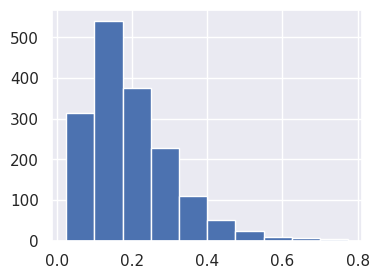

In [ ]:
val_test['score'].hist()

## Проверка на тестовой (валидационной части), подбор порога

In [ ]:
val_test.sample()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score
11637,14320,45,170,90,98.0,0.9,1.0,1.0,1.0,138.0,82.0,107.0,209.0,235.0,38.0,124.0,15.7,1.0,1.0,24.0,37.0,29.0,Y,0,Y,0,0.206251


In [ ]:
thrs = [0] + list(val_test['score'].unique())

In [ ]:
result = []
for thr in tqdm(thrs):
  val_test['y_pred'] = (val_test['score'] > thr) * 1
  result.append((thr, f1_score(val_test['smoking'],val_test['y_pred'])))


  0%|          | 0/1645 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])
t.sort_values('f1',ascending=False)

,thr,f1
1287,0.265836,0.440061
739,0.265666,0.439394
763,0.275469,0.439103
129,0.265596,0.438729
1621,0.274883,0.438400
...,...,...
609,0.674580,0.026846
257,0.702579,0.020270
1253,0.704296,0.013559
1381,0.712137,0.006803


In [ ]:
t[t['f1'] == t['f1'].max()]

,thr,f1
1287,0.265836,0.440061


Выбираем данный порог для финального предикта скора

In [ ]:
thr_final = 0.200305

## Обучение на всех данных

In [ ]:
train_full = pd.concat((train, val, val_test))

In [ ]:
len(train_full)

11091

In [ ]:
train_full_data = Pool(data=train_full[X], label=train_full[y], cat_features=cat_features )

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_full_data)

0:	learn: 0.6867571	total: 7.55ms	remaining: 7.54s
100:	learn: 0.4821646	total: 874ms	remaining: 7.78s
200:	learn: 0.4560517	total: 2.44s	remaining: 9.69s
300:	learn: 0.4420280	total: 3.39s	remaining: 7.87s
400:	learn: 0.4322462	total: 4.05s	remaining: 6.05s
500:	learn: 0.4240445	total: 4.71s	remaining: 4.69s
600:	learn: 0.4158940	total: 5.35s	remaining: 3.55s
700:	learn: 0.4074717	total: 6.02s	remaining: 2.57s
800:	learn: 0.3990258	total: 6.67s	remaining: 1.66s
900:	learn: 0.3912417	total: 7.36s	remaining: 809ms
999:	learn: 0.3837896	total: 8.03s	remaining: 0us


## Делаем предикт

In [ ]:
test.sample(1)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,score_it1,smoking_pred,smoking
2916,11175,30,165,60,80.0,1.0,1.0,1.0,1.0,108.0,69.0,90.0,193.0,67.0,51.0,128.0,15.7,1.0,0.7,16.0,12.0,21.0,Y,0,N,0.111182,0,0


In [ ]:
test['score_it1'] = model.predict_proba(test[X])[:,1]
test.sample(1)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,score_it1,smoking_pred,smoking
229,7810,80,170,75,88.2,0.8,0.7,1.0,1.0,158.0,94.0,100.0,230.0,132.0,52.0,152.0,15.3,1.0,1.2,23.0,8.0,50.0,Y,0,N,0.0758,0,0


In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Gtp,13.048317
1,age,9.501167
2,ALT,7.989190
3,triglyceride,7.808981
4,hemoglobin,6.399269
5,waist(cm),5.716436
6,HDL,5.066940
7,LDL,4.949974
8,serum creatinine,4.649883
9,systolic,4.009818


In [ ]:
test['smoking_pred'] = (test['score_it1'] >= thr_final) * 1

In [ ]:
test.sample(10)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,score_it1,smoking_pred,smoking
1179,1211,60,165,65,83.5,0.4,0.7,1.0,1.0,104.0,65.0,100.0,114.0,154.0,30.0,53.0,12.7,3.0,0.9,57.0,60.0,477.0,Y,0,N,0.216219,1,1
4192,9815,40,175,80,90.0,1.0,1.2,1.0,1.0,115.0,75.0,83.0,257.0,168.0,62.0,161.0,15.2,1.0,1.0,41.0,66.0,44.0,Y,0,N,0.154053,0,0
2421,17440,60,160,60,79.0,1.5,1.5,1.0,1.0,141.0,87.0,94.0,190.0,103.0,52.0,117.0,14.6,1.0,0.9,31.0,23.0,24.0,Y,0,Y,0.082043,0,0
4554,16807,60,170,80,86.0,0.9,1.0,1.0,1.0,139.0,89.0,89.0,147.0,121.0,59.0,64.0,15.8,1.0,0.8,29.0,26.0,52.0,Y,0,N,0.200380,1,0
4281,1992,30,175,80,91.5,1.0,0.5,1.0,1.0,101.0,63.0,85.0,192.0,86.0,55.0,120.0,16.0,1.0,1.0,21.0,23.0,18.0,Y,0,Y,0.127070,0,0
4010,1156,25,170,70,80.0,1.5,0.1,1.0,1.0,131.0,87.0,92.0,169.0,91.0,65.0,85.0,14.7,1.0,1.1,20.0,15.0,24.0,Y,0,Y,0.140241,0,0
3795,8170,30,175,80,94.0,1.2,1.2,1.0,1.0,128.0,71.0,85.0,140.0,88.0,74.0,48.0,14.2,1.0,0.8,24.0,24.0,26.0,Y,0,Y,0.131103,0,0
186,8132,35,175,75,84.0,1.2,1.2,1.0,1.0,112.0,62.0,99.0,188.0,262.0,36.0,100.0,14.9,1.0,1.0,21.0,20.0,30.0,Y,0,Y,0.216665,1,1
373,203,65,160,60,80.0,0.7,0.5,1.0,1.0,110.0,70.0,87.0,194.0,121.0,55.0,115.0,16.8,1.0,1.3,27.0,21.0,18.0,Y,0,N,0.093191,0,0
2645,10317,45,175,80,93.5,1.2,1.2,1.0,1.0,119.0,86.0,91.0,199.0,159.0,38.0,129.0,16.0,1.0,0.8,23.0,34.0,24.0,Y,0,Y,0.243187,1,1


In [ ]:
test['smoking_pred'].mean()

0.38724335240659713

In [ ]:
train['smoking'].mean()

0.20466254507985573

In [ ]:
test['smoking'] = test['smoking_pred']

## Результаты

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it_2.csv', index = False)

**Score: 0.43961**


Результат хуже.
Предварительные выводы:

Обучение с большей валидацией, показало себя лучше чем обучение на меньших валидационных данных и большем количество тестовых данных для определения порога.

# **[BEST]** Итерация 3. С подбором гиперпараметров

**Кракто об итерации:**

Подбор гиперпараметров при помощи сетки (grid)

## Предобработка

## Деление на тренировочную и валидационную выборки

In [ ]:
train_full = train

In [ ]:
# делаю валидационную выборку для оценки и проверки
val, train = train_test_split(train_full, train_size=0.2, random_state=7374)

In [ ]:
train_full.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

## Настройка параметров модели, обучение

In [ ]:
X = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar'] #'gender',

cat_features = ['oral', 'tartar'] #'gender'

y = ['smoking']

In [ ]:
params = {'verbose':100,
          'random_seed':7374}#,
          #'learning_rate':0.0095}
          #, 'eval_metric':['AUC','F1']

### Построение grid c гиперпараметрами

In [ ]:
grid = {'learning_rate': [0.0095, 0.0085, 0.0105, 0.02], 'depth': [5, 6, 10]}

## Обучение на тренировочной + валидационной выборке

In [ ]:
# делю валидационную выборку дял того чтобы получить часть на которой можно будет оценить точность
val, val_test = train_test_split(val, train_size=0.2, random_state=7374)

In [ ]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features )
valid_data = Pool(data=val[X], label=val[y], cat_features=cat_features )

In [ ]:
#создается модель
model = CatBoostClassifier(**params)
#результаты
result = model.grid_search(grid, train_data, verbose=False)

0:	learn: 0.6889235	test: 0.6891597	best: 0.6891597 (0)	total: 4.49ms	remaining: 4.48s
100:	learn: 0.5094901	test: 0.5251314	best: 0.5251314 (100)	total: 355ms	remaining: 3.16s
200:	learn: 0.4766347	test: 0.5007092	best: 0.5007092 (200)	total: 696ms	remaining: 2.77s
300:	learn: 0.4615924	test: 0.4926999	best: 0.4926999 (300)	total: 1.03s	remaining: 2.39s
400:	learn: 0.4514323	test: 0.4888118	best: 0.4888118 (400)	total: 1.42s	remaining: 2.12s
500:	learn: 0.4428536	test: 0.4851631	best: 0.4851631 (500)	total: 1.77s	remaining: 1.76s
600:	learn: 0.4356852	test: 0.4825879	best: 0.4825879 (600)	total: 2.12s	remaining: 1.41s
700:	learn: 0.4287359	test: 0.4804406	best: 0.4804406 (700)	total: 2.46s	remaining: 1.05s
800:	learn: 0.4219605	test: 0.4790704	best: 0.4790704 (800)	total: 2.81s	remaining: 697ms
900:	learn: 0.4149905	test: 0.4774032	best: 0.4773994 (899)	total: 3.15s	remaining: 346ms
999:	learn: 0.4075136	test: 0.4763551	best: 0.4763551 (999)	total: 3.49s	remaining: 0us

bestTest = 0.4

In [ ]:
#Лучшие найденные параметры
result['params']

{'depth': 10, 'learning_rate': 0.0105}

Согласно https://catboost.ai/en/docs/concepts/python-reference_catboost_grid_search



***After searching, the model is trained and ready to use.***

In [ ]:
val_test['score'] = model.predict_proba(val_test[X])[:,1]
val_test

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score
2547,3492,30,170,75,95.0,1.2,1.2,1.0,1.0,114.0,70.0,100.0,199.0,175.0,55.0,109.0,16.0,2.0,1.0,22.0,31.0,37.0,Y,0,Y,0,0.224959
12653,6255,65,170,80,93.0,0.7,0.6,1.0,1.0,138.0,76.0,111.0,141.0,53.0,86.0,27.0,13.9,1.0,0.7,23.0,14.0,29.0,Y,0,N,0,0.046591
11783,5609,35,170,80,94.0,1.5,1.5,1.0,1.0,112.0,62.0,95.0,178.0,65.0,46.0,119.0,15.8,1.0,1.0,28.0,39.0,27.0,Y,0,N,0,0.060593
10175,2051,25,165,70,79.6,1.0,0.5,1.0,1.0,130.0,61.0,92.0,148.0,80.0,59.0,73.0,16.7,1.0,1.0,18.0,15.0,27.0,Y,0,Y,0,0.105315
11492,4593,25,175,70,79.0,1.2,1.0,1.0,1.0,110.0,70.0,97.0,225.0,126.0,71.0,129.0,16.4,1.0,1.1,21.0,20.0,34.0,Y,0,N,0,0.289192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,10416,55,175,75,91.0,0.8,0.8,1.0,1.0,110.0,61.0,91.0,203.0,66.0,52.0,137.0,13.9,1.0,0.9,18.0,13.0,18.0,Y,1,N,0,0.058082
7759,3265,40,175,75,81.0,1.5,1.5,1.0,1.0,128.0,76.0,90.0,176.0,65.0,55.0,108.0,15.3,1.0,1.0,22.0,21.0,21.0,Y,1,N,0,0.149550
2233,17395,25,175,80,86.0,1.2,1.2,1.0,1.0,128.0,85.0,89.0,250.0,166.0,56.0,160.0,15.2,2.0,0.9,30.0,48.0,40.0,Y,0,Y,0,0.094539
13246,17058,25,170,80,93.0,1.5,1.2,1.0,1.0,118.0,75.0,83.0,228.0,26.0,63.0,159.0,16.0,1.0,0.9,25.0,36.0,53.0,Y,1,N,0,0.182783


<Axes: >

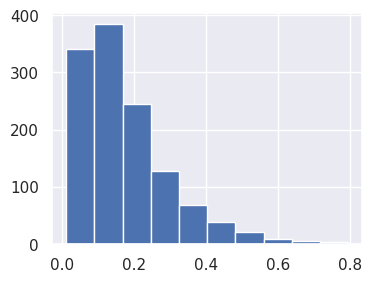

In [ ]:
val_test['score'].hist()

## Проверка на тестовой (валидационной части), подбор порога

In [ ]:
val_test.sample()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score
12557,7034,25,175,80,90.0,1.2,1.0,1.0,1.0,140.0,93.0,71.0,226.0,135.0,60.0,139.0,17.3,1.0,1.0,25.0,24.0,51.0,Y,0,Y,0,0.285926


In [ ]:
thrs = [0] + list(val_test['score'].unique())

In [ ]:
result = []
for thr in tqdm(thrs):
  val_test['y_pred'] = (val_test['score'] > thr) * 1
  result.append((thr, f1_score(val_test['smoking'],val_test['y_pred'])))


  0%|          | 0/1231 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])
t.sort_values('f1',ascending=False)

,thr,f1
1106,0.157816,0.434032
625,0.157636,0.433498
25,0.163063,0.433460
80,0.162570,0.433249
248,0.161035,0.433041
...,...,...
58,0.708951,0.023715
490,0.736642,0.015873
1100,0.764247,0.007968
268,0.777743,0.000000


In [ ]:
t[t['f1'] == t['f1'].max()]

,thr,f1
1106,0.157816,0.434032


Выбираем данный порог для финального предикта скора

In [ ]:
thr_final = 0.213038

## Обучение на всех данных

In [ ]:
#перезаписываем параметры из обучения на сетке
params = {'verbose':100,
          'random_seed':7374,
          'depth': 10,
          'learning_rate': 0.02}

In [ ]:
train_full = pd.concat((train, val, val_test))

In [ ]:
len(train_full)

7764

In [ ]:
train_full_data = Pool(data=train_full[X], label=train_full[y], cat_features=cat_features )

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_full_data)

0:	learn: 0.6836581	total: 30.5ms	remaining: 30.4s
100:	learn: 0.4243428	total: 3.04s	remaining: 27.1s
200:	learn: 0.3528711	total: 6.09s	remaining: 24.2s
300:	learn: 0.3075157	total: 10.3s	remaining: 23.9s
400:	learn: 0.2702579	total: 13.3s	remaining: 19.9s
500:	learn: 0.2350847	total: 16.4s	remaining: 16.3s
600:	learn: 0.2015644	total: 19.8s	remaining: 13.2s
700:	learn: 0.1766025	total: 23.6s	remaining: 10s
800:	learn: 0.1523754	total: 26.5s	remaining: 6.59s
900:	learn: 0.1326264	total: 29.6s	remaining: 3.25s
999:	learn: 0.1160802	total: 33.8s	remaining: 0us


## Делаем предикт

In [ ]:
test.sample(1)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,score_it1,smoking_pred,smoking
2000,17563,20,175,85,87.0,1.2,1.0,1.0,1.0,120.0,70.0,91.0,213.0,119.0,66.0,123.0,16.1,1.0,1.2,120.0,49.0,19.0,Y,0,N,0.043765,0,0


In [ ]:
test['score_it1'] = model.predict_proba(test[X])[:,1]
test.sample(1)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,score_it1,smoking_pred,smoking
4378,19507,35,165,70,90.1,1.2,1.2,1.0,1.0,112.0,73.0,88.0,196.0,182.0,38.0,122.0,15.7,1.0,0.8,16.0,19.0,21.0,Y,0,Y,0.091406,0,0


In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Gtp,8.002556
1,hemoglobin,6.912771
2,triglyceride,6.785684
3,age,6.211470
4,ALT,5.976218
5,HDL,5.862181
6,LDL,5.606210
7,waist(cm),5.478238
8,systolic,5.444782
9,AST,5.195345


In [ ]:
test['smoking_pred'] = (test['score_it1'] >= thr_final) * 1

In [ ]:
test.sample(10)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,score_it1,smoking_pred,smoking
5526,8659,25,180,75,86.0,1.2,1.5,1.0,1.0,126.0,73.0,107.0,225.0,57.0,82.0,131.0,15.7,1.0,1.1,31.0,29.0,81.0,Y,0,Y,0.174918,0,0
2473,10976,40,170,65,74.0,0.9,1.0,1.0,1.0,117.0,70.0,88.0,231.0,189.0,49.0,144.0,14.9,1.0,1.0,22.0,22.0,21.0,Y,1,N,0.086107,0,0
3254,15096,25,160,55,71.8,0.6,0.7,1.0,1.0,114.0,69.0,70.0,151.0,83.0,66.0,68.0,15.4,1.0,0.8,23.0,17.0,19.0,Y,0,Y,0.136946,0,0
2295,16909,35,165,65,77.4,1.2,1.5,1.0,1.0,119.0,76.0,88.0,219.0,107.0,57.0,140.0,16.0,1.0,1.0,26.0,21.0,33.0,Y,1,Y,0.182461,0,1
2363,11570,40,170,55,67.5,1.5,1.5,1.0,1.0,109.0,72.0,79.0,157.0,51.0,75.0,71.0,16.3,1.0,1.0,16.0,14.0,16.0,Y,0,N,0.089495,0,0
426,17956,55,160,60,82.0,0.6,0.7,1.0,1.0,139.0,86.0,154.0,148.0,96.0,57.0,72.0,15.8,1.0,1.0,45.0,61.0,126.0,Y,0,Y,0.235888,1,1
1386,5963,60,160,55,77.0,0.8,0.8,2.0,2.0,136.0,99.0,108.0,149.0,101.0,47.0,82.0,13.8,1.0,1.0,17.0,17.0,17.0,Y,0,Y,0.058913,0,0
4689,18447,30,175,80,93.0,0.9,0.9,1.0,1.0,114.0,80.0,78.0,250.0,78.0,48.0,186.0,15.4,1.0,0.8,27.0,28.0,25.0,Y,1,Y,0.060200,0,0
2664,2243,40,160,80,86.0,1.0,1.2,1.0,1.0,140.0,80.0,142.0,205.0,108.0,61.0,122.0,15.4,1.0,0.9,22.0,49.0,64.0,Y,0,N,0.071149,0,0
3286,9323,30,170,75,78.0,1.5,1.5,1.0,1.0,120.0,80.0,95.0,185.0,136.0,50.0,108.0,14.7,1.0,1.1,20.0,22.0,19.0,Y,0,Y,0.134462,0,0


In [ ]:
test['smoking_pred'].mean()

0.2255132951868058

In [ ]:
train['smoking'].mean()

0.20814552479072762

In [ ]:
test['smoking'] = test['smoking_pred']

## **Результаты**

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it_3_full.csv', index = False)

Score: **0.44048** - подбор порога на тестовой валидационной выборке, но без обучения с перезаписью параметров на полной выборке

Score: **0.45504** - порог выбран по-прежнему на тестовой валидационной выборке, обучения с перезаписью параметров на полной выборке

Score: **0.39527** - после обучения модели на всех данных, сделал для эксперимента предикт на val_test (то есть скормил модели данные на которых она сама обучалась частично). Порог сильно изменился, однако и результат сабмита тоже сильно упал


По нормальной схеме:
- с нормальным порядком (последовательностью действий)
- с получением параметров на train,
- порога на val_test,
- далее с обучением с полученными параметрами на всех train_full
- и предиктов на test
... получилось улучшить свой результат и пододвинуться в топ-10, на **8-ую** строчку в лидерборде.

# Итерация 4. С подбором гиперпараметров и eval_metric = F1

**Кракто об итерации:**

Подбор гиперпараметров при помощи сетки (grid) и изменение параметра eval_metric

## Предобработка

## Деление на тренировочную и валидационную выборки

In [ ]:
train_full = train

In [ ]:
# делаю валидационную выборку для оценки и проверки
val, train = train_test_split(train_full, train_size=0.2, random_state=7374)

In [ ]:
train_full.columns

Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

## Настройка параметров модели, обучение

In [ ]:
X = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar']

cat_features = ['oral', 'tartar']

y = ['smoking']

In [ ]:
params = {'verbose':100,
          'random_seed':7374,
          'eval_metric': 'F1',
          'early_stopping_rounds': 201} #to make process faster

### Построение grid c гиперпараметрами

In [ ]:
grid = {'learning_rate': [0.0095, 0.0105, 0.02, 0.025, 0.0275, 0.03], 'depth': [6, 10, 16]}

## Обучение на тренировочной + валидационной выборке

In [ ]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features )
valid_data = Pool(data=val[X], label=val[y], cat_features=cat_features )

In [ ]:
#создается модель
model = CatBoostClassifier(**params)
#результаты
result = model.grid_search(grid, train_data, verbose=False)

0:	learn: 0.0097919	test: 0.0000000	best: 0.0000000 (0)	total: 4.5ms	remaining: 4.5s
100:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 417ms	remaining: 3.71s
200:	learn: 0.0219245	test: 0.0000000	best: 0.0000000 (0)	total: 863ms	remaining: 3.43s
Stopped by overfitting detector  (201 iterations wait)

bestTest = 0
bestIteration = 0

0:	learn: 0.0097919	test: 0.0000000	best: 0.0000000 (0)	total: 4.17ms	remaining: 4.17s
100:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 434ms	remaining: 3.87s
200:	learn: 0.0267315	test: 0.0000000	best: 0.0000000 (0)	total: 852ms	remaining: 3.39s
Stopped by overfitting detector  (201 iterations wait)

bestTest = 0
bestIteration = 0

0:	learn: 0.0097919	test: 0.0000000	best: 0.0000000 (0)	total: 4.02ms	remaining: 4.02s
100:	learn: 0.0243309	test: 0.0000000	best: 0.0000000 (0)	total: 425ms	remaining: 3.78s
200:	learn: 0.1138211	test: 0.0181818	best: 0.0181818 (189)	total: 849ms	remaining: 3.38s
300:	learn: 0.2227074	test: 0.06140

KeyboardInterrupt: 

In [ ]:
#Лучшие найденные параметры
result['params']

Согласно https://catboost.ai/en/docs/concepts/python-reference_catboost_grid_search



***After searching, the model is trained and ready to use.***

In [ ]:
val['score'] = model.predict_proba(val[X])[:,1]
val

In [ ]:
val['score'].hist()

## Проверка на тестовой (валидационной части), подбор порога

In [ ]:
val.sample()

In [ ]:
thrs = [0] + list(val['score'].unique())

In [ ]:
result = []
for thr in tqdm(thrs):
  val['y_pred'] = (val['score'] > thr) * 1
  result.append((thr, f1_score(val['smoking'],val['y_pred'])))


In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])
t.sort_values('f1',ascending=False)

In [ ]:
t[t['f1'] == t['f1'].max()]

Выбираем данный порог для финального предикта скора

In [ ]:
thr_final = 0.200459

## Обучение на всех данных

In [ ]:
#перезаписываем параметры из обучения на сетке
params = {'verbose':100,
          'random_seed':7374,
          'depth': 6,
          'learning_rate': 0.03,
          'eval_metric': 'F1'}

In [ ]:
train_full = pd.concat((train, val))

In [ ]:
len(train_full)

In [ ]:
train_full_data = Pool(data=train_full[X], label=train_full[y], cat_features=cat_features )

In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_full_data)

## Делаем предикт

In [ ]:
test.sample(1)

In [ ]:
test['score_it1'] = model.predict_proba(test[X])[:,1]
test.sample(1)

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
test['smoking_pred'] = (test['score_it1'] >= thr_final) * 1

In [ ]:
test.sample(10)

In [ ]:
test['smoking_pred'].mean()

In [ ]:
train['smoking'].mean()

In [ ]:
test['smoking'] = test['smoking_pred']

## Результаты

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it_42.csv', index = False)

C явно указанным 'eval_metric': 'F1' результаты оказались немного хуже, чем со значением по умолчанию.

#Итерация 5. Подбор гипермараметров используя библиотеку **hyperopt**

In [ ]:
train = pd.read_csv('/content/competition_format/train.csv')

test = pd.read_csv('/content/competition_format/test.csv')

columns_to_replace = ['oral', 'tartar']
train[columns_to_replace] = train[columns_to_replace].replace({'Y': 1, 'N': 0})
test[columns_to_replace] = test[columns_to_replace].replace({'Y': 1, 'N': 0})

In [ ]:
!pip install hyperopt
import hyperopt

In [ ]:
X = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar'] #'gender',

cat_features = ['oral', 'tartar'] #'gender'

y = ['smoking']

In [ ]:
SEED = 7374

In [ ]:
def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric=metrics.Accuracy(),
        random_seed=42,
        verbose=False,
        loss_function=metrics.Logloss(),
    )

    cv_data = cv(
        Pool(train[X], train[y], cat_features=cat_features),
        model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])

    return 1 - best_accuracy # as hyperopt minimises

In [ ]:
from numpy.random import RandomState



params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(SEED)
)

print(best)



In [ ]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=500,
    eval_metric=metrics.Accuracy(),
    random_seed=SEED,
    verbose=False,
    loss_function=metrics.Logloss(),
)
cv_data = cv(Pool(train[X], train[y], cat_features=cat_features), model.get_params())

In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

In [ ]:
model.fit(train[X], train[y], cat_features=cat_features)

In [ ]:
test['score_it5_hyper'] = model.predict_proba(test[X])[:,1]

In [ ]:
thr_final = 0.200459

In [ ]:
test['smoking'] = (test['score_it5_hyper'] >= thr_final) * 1

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it_5_hyper2.csv', index = False)

## Еще одна под-итерация с предобработкой

In [ ]:
model.get_feature_importance(prettified = True)

Уберем из списка фичей 5 самых бесполезных

Заменем фичи weight(kg)	и  weight(kg) новой:

In [ ]:
train['BMI'] = train['weight(kg)'] / (train['height(cm)']/100 * train['height(cm)']/100)
test['BMI'] = test['weight(kg)'] / (test['height(cm)']/100 * test['height(cm)']/100)

In [ ]:
X = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp',
       ] #'gender',

y = ['smoking']

In [ ]:
train.sample(2)

In [ ]:
def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric=metrics.Accuracy(),
        random_seed=42,
        verbose=False,
        loss_function=metrics.Logloss(),
    )

    cv_data = cv(
        Pool(train[X], train[y]),
        model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])

    return 1 - best_accuracy # as hyperopt minimises

In [ ]:
from numpy.random import RandomState



params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(SEED)
)

print(best)



In [ ]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=500,
    eval_metric=metrics.Accuracy(),
    random_seed=SEED,
    verbose=False,
    loss_function=metrics.Logloss(),
)
cv_data = cv(Pool(train[X], train[y]), model.get_params())

In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

In [ ]:
model.fit(train[X], train[y])

In [ ]:
test['score_it5_hyper2'] = model.predict_proba(test[X])[:,1]

In [ ]:
thr_final = 0.200459

In [ ]:
test['smoking'] = (test['score_it5_hyper2'] >= thr_final) * 1

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it_5_hyper22.csv', index = False)

Предикт с меньшим числом фич оказался хуже. Но нужно сделать тоже самое, только с уточнением порога (thrs_final) на валидационной выборке

# Итерация 6. Предикт с подсчетом порога на валидационной выборке

Заменем фичи weight(kg)	и  weight(kg) новой:

In [ ]:
model.get_feature_importance(prettified = True)

In [ ]:
train['BMI'] = train['weight(kg)'] / (train['height(cm)']/100 * train['height(cm)']/100)
test['BMI'] = test['weight(kg)'] / (test['height(cm)']/100 * test['height(cm)']/100)

In [ ]:
X = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp',
       ] #'gender',

y = ['smoking']

In [ ]:
train.sample(2)

## Деление на тренировочную и валидационную выборки

In [ ]:
# делаю валидационную выборку для оценки и проверки
val, train = train_test_split(train, train_size=0.10, random_state=7374)

In [ ]:
len(val)

## Hyperopt. Подбор параметров.

In [ ]:
def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric=metrics.Accuracy(),
        random_seed=42,
        verbose=False,
        loss_function=metrics.Logloss(),
    )

    cv_data = cv(
        Pool(train[X], train[y]),
        model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])

    return 1 - best_accuracy # as hyperopt minimises

In [ ]:
from numpy.random import RandomState



params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(SEED)
)

print(best)



In [ ]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=500,
    eval_metric=metrics.Accuracy(),
    random_seed=SEED,
    verbose=False,
    loss_function=metrics.Logloss(),
)
cv_data = cv(Pool(train[X], train[y]), model.get_params())

In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

In [ ]:
model.fit(train[X], train[y])

## Проверка на тестовой (валидационной части), подбор порога

In [ ]:
val['score'] = model.predict_proba(val[X])[:,1]

In [ ]:
val.sample(2)

In [ ]:
thrs = [0] + list(val['score'].unique())

In [ ]:
result = []
for thr in tqdm(thrs):
  val['y_pred'] = (val['score'] > thr) * 1
  result.append((thr, f1_score(val['smoking'],val['y_pred'])))


In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])
t.sort_values('f1',ascending=False)

In [ ]:
t[t['f1'] == t['f1'].max()]

Выбираем данный порог для финального предикта скора

In [ ]:
thr_final = 0.237802

## Обучение и предикт на всех данных

In [ ]:
train_full = pd.concat([train, val])

In [ ]:
len(train_full)

In [ ]:
model.fit(train_full[X], train_full[y])

In [ ]:
test['score_it6_hyper'] = model.predict_proba(test[X])[:,1]

In [ ]:
test['smoking'] = (test['score_it6_hyper'] >= thr_final) * 1

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it_6.csv', index = False)

Score: **0.43442**


Результат не улучшен. Возможно не стоили убирать фичи

# Итерация 7. Предикт используя библиотеку **hyperopt** с подсчетом порога на валидационной выборке

In [ ]:
columns_to_replace = ['oral', 'tartar']
train[columns_to_replace] = train[columns_to_replace].replace({'Y': 1, 'N': 0})
test[columns_to_replace] = test[columns_to_replace].replace({'Y': 1, 'N': 0})

Добавим рандомную переменную чтобы далее оценить по feature_importance

In [ ]:
import random

train['featureX'] = np.random.randint(800, 1200, train.shape[0])
test['featureX'] = np.random.randint(800, 1200, test.shape[0])

In [ ]:
train.sample(2)

In [ ]:
X = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'featureX']

cat_features = ['oral', 'tartar']

y = ['smoking']

## Деление на тренировочную и валидационную выборки

In [ ]:
len(train)

In [ ]:
# делаю валидационную выборку для оценки и проверки
val, train = train_test_split(train, train_size=0.10, random_state=7374)

In [ ]:
len(val)

## Hyperopt. Подбор параметров.

In [ ]:
def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric=metrics.Accuracy(),
        random_seed=42,
        verbose=False,
        loss_function=metrics.Logloss(),
    )

    cv_data = cv(
        Pool(train[X], train[y], cat_features = cat_features),
        model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])

    return 1 - best_accuracy # as hyperopt minimises

In [ ]:
from numpy.random import RandomState



params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(SEED)
)

print(best)

In [ ]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=500,
    eval_metric=metrics.Accuracy(),
    random_seed=SEED,
    verbose=False,
    loss_function=metrics.Logloss(),
)
cv_data = cv(Pool(train[X], train[y], cat_features = cat_features), model.get_params())

In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

In [ ]:
model.fit(train[X], train[y])

In [ ]:
model.get_feature_importance(prettified = True)

In [ ]:
Рандомная фича оказалась на 11-ом месте среди всех
В следующей итерациии - следует попробовать сделать предикт на топ-10 фичах

## Проверка на тестовой (валидационной части), подбор порога

In [ ]:
val['score'] = model.predict_proba(val[X])[:,1]

In [ ]:
val.sample(2)

In [ ]:
thrs = [0] + list(val['score'].unique())

In [ ]:
result = []
for thr in tqdm(thrs):
  val['y_pred'] = (val['score'] > thr) * 1
  result.append((thr, f1_score(val['smoking'],val['y_pred'])))


In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])
t.sort_values('f1',ascending=False)

In [ ]:
t[t['f1'] == t['f1'].max()]

Выбираем данный порог для финального предикта скора

In [ ]:
thr_final = 0.216240

## Обучение и предикт на всех данных

In [ ]:
train_full = pd.concat([train, val])

In [ ]:
len(train_full)

In [ ]:
model.fit(train_full[X], train_full[y])

In [ ]:
test['score_it6_hyper_fake_feature'] = model.predict_proba(test[X])[:,1]

In [ ]:
test['smoking'] = (test['score_it6_hyper_fake_feature'] >= thr_final) * 1

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it_6hyper_fake_feature.csv', index = False)

Score: **0.4452**



Одна из лучших моих итераций. Но результат самого лучшего сабмита побить не удалось.

# Итерация 8. Предикт на топ-10 фичах по результатов важности на предыдущей модели

In [ ]:
model.get_feature_importance(prettified = True)

In [ ]:
train.sample(2)

In [ ]:
X = ['age', 'waist(cm)',
       'fasting blood sugar',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'ALT', 'Gtp',
       ]

y = ['smoking']

## Деление на тренировочную и валидационную выборки

In [ ]:
len(train)

In [ ]:
# делаю валидационную выборку для оценки и проверки
val, train = train_test_split(train, train_size=0.10, random_state=7374)

In [ ]:
len(val)

## Hyperopt. Подбор параметров.

In [ ]:
def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric=metrics.Accuracy(),
        random_seed=42,
        verbose=False,
        loss_function=metrics.Logloss(),
    )

    cv_data = cv(
        Pool(train[X], train[y]),
        model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])

    return 1 - best_accuracy # as hyperopt minimises

In [ ]:
from numpy.random import RandomState



params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(SEED)
)

print(best)

In [ ]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=500,
    eval_metric=metrics.Accuracy(),
    random_seed=SEED,
    verbose=False,
    loss_function=metrics.Logloss(),
)
cv_data = cv(Pool(train[X], train[y]), model.get_params())

In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

In [ ]:
model.fit(train[X], train[y])

In [ ]:
model.get_feature_importance(prettified = True)

## Проверка на тестовой (валидационной части), подбор порога

In [ ]:
val['score'] = model.predict_proba(val[X])[:,1]

In [ ]:
val.sample(2)

In [ ]:
thrs = [0] + list(val['score'].unique())

In [ ]:
result = []
for thr in tqdm(thrs):
  val['y_pred'] = (val['score'] > thr) * 1
  result.append((thr, f1_score(val['smoking'],val['y_pred'])))


In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])
t.sort_values('f1',ascending=False)

In [ ]:
t[t['f1'] == t['f1'].max()]

Выбираем данный порог для финального предикта скора

In [ ]:
thr_final = 0.236196

## Обучение и предикт на всех данных

In [ ]:
train_full = pd.concat([train, val])

In [ ]:
len(train_full)

In [ ]:
model.fit(train_full[X], train_full[y])

In [ ]:
test['score_it8_hyper10'] = model.predict_proba(test[X])[:,1]

In [ ]:
test['smoking'] = (test['score_it8_hyper10'] >= thr_final) * 1

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it8_hyper10.csv', index = False)

Score: **0.42451**


Результат хуже, чем на аналогичной моделе но со всеми фичами. Меньше в данном случае не значит лучше

## Итерация 9. Catboost + GridSearchCV + OHE


In [ ]:
# дополнительные модули

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

Отдельно делаем скорер для обучения на f1 метрике

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score, pos_label="yes")

In [ ]:
len(train)

13863

In [ ]:
train.sample(2)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
235,15583,75,160,65,87.8,0.2,0.2,1.0,1.0,119.0,60.0,92.0,175.0,121.0,40.0,111.0,14.2,1.0,1.0,21.0,10.0,31.0,Y,0,N,0
3900,9469,50,165,85,104.8,0.4,0.7,1.0,1.0,118.0,70.0,100.0,174.0,159.0,57.0,85.0,14.7,1.0,0.6,22.0,36.0,46.0,Y,0,Y,0


In [ ]:
# делаю валидационную выборку для оценки и проверки
val, train = train_test_split(train, train_size=0.10, random_state=7374, stratify = train['smoking'])

In [ ]:
len(val)

1386

In [ ]:
X = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar']

cat_features = ['oral', 'tartar']

numeric_features = [col for col in train[X].columns if col not in cat_features]

y = ['smoking']

## Параметры

In [ ]:
params = {'verbose': [100],
          'random_seed':[7374],
          'eval_metric': ['F1'],
          'early_stopping_rounds': [201],
          'learning_rate': [0.0095, 0.0105, 0.02, 0.025, 0.0275, 0.03],
          'depth': [6, 10]}

In [ ]:
# Инициализируем кэтбустовый классификатор
model = CatBoostClassifier()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features), #опция "passthrough" используется для указания того, что некоторые столбцы датафрейма должны остаться без изменений при преобразовании
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [ ]:
# Инициализируем GridSearchCV
grid_search = GridSearchCV(model, params, scoring=f1_score, cv=5, n_jobs=-1, verbose = 1)

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', grid_search)])

## Обучение

In [ ]:
pipeline.fit(train[X], train[y])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


0:	learn: 0.0031671	total: 56ms	remaining: 56s
100:	learn: 0.0000000	total: 774ms	remaining: 6.89s
200:	learn: 0.0000000	total: 1.51s	remaining: 5.99s
300:	learn: 0.0086922	total: 2.23s	remaining: 5.18s
400:	learn: 0.0358395	total: 2.95s	remaining: 4.4s
500:	learn: 0.0659256	total: 4.02s	remaining: 4s
600:	learn: 0.0991736	total: 5.67s	remaining: 3.76s
700:	learn: 0.1297457	total: 6.64s	remaining: 2.83s
800:	learn: 0.1586382	total: 7.36s	remaining: 1.83s
900:	learn: 0.1796707	total: 8.06s	remaining: 886ms
999:	learn: 0.1970234	total: 8.77s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'height(cm)',
                                                   'weight(kg)', 'waist(cm)',
                                                   'eyesight(left)',
                                                   'eyesight(right)',
                                                   'hearing(left)',
                                                   'hearing(right)', 'systolic',
                                                   'relaxation',
                                                   'fasting blood sugar',
                                                   'Cholesterol',
                                                   'triglyceride', 'HDL', 'LDL',
                                                   'hemoglobin',
                                                   'Urine protein',
                                                   'serum creatinine', 'AST',
                                                   'ALT', 'Gtp',
                                                   'de...
                                                  ['oral', 'tartar'])])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=<catboost.core.CatBoostClassifier object at 0x78b61a58b1f0>,
                              n_jobs=-1,
                              param_grid={'depth': [6, 10],
                                          'early_stopping_rounds': [201],
                                          'eval_metric': ['F1'],
                                          'learning_rate': [0.0095, 0.0105,
                                                            0.02, 0.025, 0.0275,
                                                            0.03],
                                          'random_seed': [7374],
                                          'verbose': [100]},
                              scoring=<function f1_score at 0x78b64927ed40>,
                              verbose=1))])

In [ ]:
# Лучшая модель
best_estimator = grid_search.best_params_
best_estimator

{'depth': 6,
 'early_stopping_rounds': 201,
 'eval_metric': 'F1',
 'learning_rate': 0.0095,
 'random_seed': 7374,
 'verbose': 100}

## Проверка на тестовой (валидационной части), подбор порога

In [ ]:
val['score'] = pipeline.predict_proba(val[X])[:,1]

In [ ]:
val.sample(2)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,score
13826,6984,50,170,75,88.5,1.5,1.0,1.0,1.0,136.0,88.0,107.0,169.0,230.0,40.0,83.0,16.8,1.0,0.7,23.0,32.0,25.0,Y,1,N,0,0.282773
2542,11428,30,175,90,95.3,0.6,0.6,1.0,1.0,135.0,81.0,89.0,162.0,96.0,48.0,95.0,14.7,1.0,0.7,27.0,41.0,23.0,Y,1,Y,1,0.162178


In [ ]:
thrs = [0] + list(val['score'].unique())

In [ ]:
result = []
for thr in tqdm(thrs):
  val['y_pred'] = (val['score'] > thr) * 1
  result.append((thr, f1_score(val['smoking'],val['y_pred'])))


  0%|          | 0/1376 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])
t.sort_values('f1',ascending=False)

,thr,f1
965,0.223796,0.446837
227,0.224533,0.446549
376,0.223533,0.446237
829,0.224465,0.445946
932,0.222499,0.445928
...,...,...
1117,0.611634,0.021053
1370,0.650783,0.014134
1104,0.651736,0.007092
422,0.711312,0.000000


In [ ]:
t[t['f1'] == t['f1'].max()]

,thr,f1
965,0.223796,0.446837


Выбираем данный порог для финального предикта скора

In [ ]:
thr_final = 0.223796

## Обучаем модель с лучшими параметрами, но на полной дате

In [ ]:
train_full = pd.concat([train, val])

In [ ]:
len(train_full)

13863

In [ ]:
params = {'verbose': [100],
          'random_seed':[7374],
          'eval_metric': ['F1'],
          'early_stopping_rounds': [201],
          'learning_rate': [0.0095],
          'depth': [6]}

In [ ]:
# Инициализируем кэтбустовый классификатор
model = CatBoostClassifier()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features), #опция "passthrough" используется для указания того, что некоторые столбцы датафрейма должны остаться без изменений при преобразовании
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [ ]:
# Инициализируем GridSearchCV
grid_search = GridSearchCV(model, params, scoring=f1_score, cv=5, n_jobs=-1, verbose = 1)

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', grid_search)])

In [ ]:
pipeline.fit(train_full[X], train_full[y])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


0:	learn: 0.0035625	total: 34.2ms	remaining: 34.1s
100:	learn: 0.0000000	total: 1.77s	remaining: 15.7s
200:	learn: 0.0000000	total: 4.49s	remaining: 17.9s
300:	learn: 0.0127750	total: 5.7s	remaining: 13.2s
400:	learn: 0.0364273	total: 7.18s	remaining: 10.7s
500:	learn: 0.0681115	total: 8.84s	remaining: 8.81s
600:	learn: 0.0985820	total: 9.77s	remaining: 6.49s
700:	learn: 0.1341705	total: 10.5s	remaining: 4.49s
800:	learn: 0.1559543	total: 11.3s	remaining: 2.8s
900:	learn: 0.1770196	total: 12.1s	remaining: 1.32s
999:	learn: 0.1948424	total: 12.8s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'height(cm)',
                                                   'weight(kg)', 'waist(cm)',
                                                   'eyesight(left)',
                                                   'eyesight(right)',
                                                   'hearing(left)',
                                                   'hearing(right)', 'systolic',
                                                   'relaxation',
                                                   'fasting blood sugar',
                                                   'Cholesterol',
                                                   'triglyceride', 'HDL', 'LDL',
                                                   'hemoglobin',
                                                   'Urine protein',
                                                   'serum creatinine', 'AST',
                                                   'ALT', 'Gtp',
                                                   'de...
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['oral', 'tartar'])])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=<catboost.core.CatBoostClassifier object at 0x78b61a4a0700>,
                              n_jobs=-1,
                              param_grid={'depth': [6],
                                          'early_stopping_rounds': [201],
                                          'eval_metric': ['F1'],
                                          'learning_rate': [0.0095],
                                          'random_seed': [7374],
                                          'verbose': [100]},
                              scoring=<function f1_score at 0x78b64927ed40>,
                              verbose=1))])

## Делаем предикт

In [ ]:
test['score_it9'] = pipeline.predict_proba(test[X])[:,1]

In [ ]:
test['smoking'] = (test['score_it9'] >= thr_final) * 1

In [ ]:
test[['ID', 'smoking']].to_csv('leo_class_it9_1.csv', index = False)

**Score: 0.44225**

# **Результат**

На момент написания удалось попасть **на 8 строчку из 58 участников**.

Получен ценный опыт, удалось чуть более комплексно подходить к каждой итерации.

https://www.kaggle.com/competitions/leopard-challenge-classification/leaderboard